# ==>Get Data From API 

# Import Libraries

In [53]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime

# Adjust display options for DataFrames

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Function to fetch the rocket version using the SpaceX API

In [55]:
def fetch_booster_versions(df):
    for rocket_id in df['rocket']:
        if rocket_id:
            rocket_data = requests.get(f"https://api.spacexdata.com/v4/rockets/{rocket_id}").json()
            rocket_versions.append(rocket_data['name'])
    return rocket_versions

# Function to fetch the launch site information

In [56]:
def fetch_launch_site_info(df):
    for pad_id in df['launchpad']:
        if pad_id:
            pad_data = requests.get(f"https://api.spacexdata.com/v4/launchpads/{pad_id}").json()
            site_longitude.append(pad_data['longitude'])
            site_latitude.append(pad_data['latitude'])
            site_names.append(pad_data['name'])

# Function to retrieve payload data

In [57]:
def fetch_payload_details(df):
    for payload_id in df['payloads']:
        if payload_id:
            payload_data = requests.get(f"https://api.spacexdata.com/v4/payloads/{payload_id}").json()
            payload_masses.append(payload_data['mass_kg'])
            payload_orbits.append(payload_data['orbit'])

# Function to get core-related information

In [58]:
def fetch_core_info(df):
    for core in df['cores']:
        if core['core']:
            core_data = requests.get(f"https://api.spacexdata.com/v4/cores/{core['core']}").json()
            core_blocks.append(core_data.get('block'))
            reuse_counts.append(core_data.get('reuse_count'))
            core_serials.append(core_data.get('serial'))
        else:
            core_blocks.append(None)
            reuse_counts.append(None)
            core_serials.append(None)

        landing_outcomes.append(f"{core['landing_success']} {core['landing_type']}")
        flight_numbers.append(core['flight'])
        gridfins_status.append(core['gridfins'])
        reuse_status.append(core['reused'])
        landing_legs.append(core['legs'])
        landing_pads.append(core['landpad'])

# Fetch the past launches data from SpaceX API

In [59]:
launch_url = "https://api.spacexdata.com/v4/launches/past"
launch_response = requests.get(launch_url)
launch_data = pd.json_normalize(launch_response.json())

# Filter out rows with multiple cores and payloads

In [60]:
launch_data = launch_data[launch_data['cores'].map(len) == 1]
launch_data = launch_data[launch_data['payloads'].map(len) == 1]


# Unpack the single-element lists in 'cores' and 'payloads' columns

In [61]:
launch_data['cores'] = launch_data['cores'].apply(lambda x: x[0])
launch_data['payloads'] = launch_data['payloads'].apply(lambda x: x[0])


# Convert 'date_utc' to date type and filter by specific date

In [62]:
launch_data['date'] = pd.to_datetime(launch_data['date_utc']).dt.date
launch_data = launch_data[launch_data['date'] <= datetime(2020, 11, 13).date()]

# Lists to store the parsed data

In [63]:
rocket_versions = []
payload_masses = []
payload_orbits = []
site_names = []
landing_outcomes = []
flight_numbers = []
gridfins_status = []
reuse_status = []
landing_legs = []
landing_pads = []
core_blocks = []
reuse_counts = []
core_serials = []
site_longitude = []
site_latitude = []

# Extract data using the helper functions

In [64]:
fetch_booster_versions(launch_data)
fetch_launch_site_info(launch_data)
fetch_payload_details(launch_data)
fetch_core_info(launch_data)

# Create a dictionary to organize the extracted data

In [65]:
launch_summary = {
    'FlightNumber': list(launch_data['flight_number']),
    'Date': list(launch_data['date']),
    'BoosterVersion': rocket_versions,
    'PayloadMass': payload_masses,
    'Orbit': payload_orbits,
    'LaunchSite': site_names,
    'Outcome': landing_outcomes,
    'Flights': flight_numbers,
    'GridFins': gridfins_status,
    'Reused': reuse_status,
    'Legs': landing_legs,
    'LandingPad': landing_pads,
    'Block': core_blocks,
    'ReusedCount': reuse_counts,
    'Serial': core_serials,
    'Longitude': site_longitude,
    'Latitude': site_latitude
}

# Verify the length of each column

In [66]:
for key, val in launch_summary.items():
    print(f"{key}: {len(val)}")

FlightNumber: 94
Date: 94
BoosterVersion: 94
PayloadMass: 94
Orbit: 94
LaunchSite: 94
Outcome: 94
Flights: 94
GridFins: 94
Reused: 94
Legs: 94
LandingPad: 94
Block: 94
ReusedCount: 94
Serial: 94
Longitude: 94
Latitude: 94


# Create a DataFrame from the dictionary

In [67]:
launch_df = pd.DataFrame(launch_summary)
print(launch_df.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             4  2008-09-28       Falcon 1        165.0   LEO   
3             5  2009-07-13       Falcon 1        200.0   LEO   
4             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1    NaN            0  Mer

# Filter out rows with Falcon 9

In [68]:
launch_df = launch_df[launch_df['BoosterVersion'] != 'Falcon 1']
print(launch_df.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             6  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5             8  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6            10  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7            11  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8            12  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  
4            0  B0003  -80.577366  28.561857  
5         

# Handle missing payload data by replacing NaN with the mean payload mass

In [69]:
mean_payload_mass = launch_df['PayloadMass'].mean()
launch_df['PayloadMass'].fillna(mean_payload_mass, inplace=True)

/tmp/ipykernel_37/1747900638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  launch_df['PayloadMass'].fillna(mean_payload_mass, inplace=True)


# Check for missing values

In [70]:
print(launch_df.isnull().sum())

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64


In [71]:
launch_df['LandingPad'].fillna('unknown', inplace=True)  
launch_df['LandingPad'].replace('', 'unknown', inplace=True)  

/tmp/ipykernel_37/3930939201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  launch_df['LandingPad'].fillna('unknown', inplace=True)


# Save the cleaned data to a CSV file

In [72]:
launch_df.to_csv('spacex_launch_data.csv', index=False)

In [73]:
launch_df.to_csv('/kaggle/working/dataset_part_1.csv', index=False)

# ===>Exploratory Data Analysis 

# Import Libraries

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset and identify column types

In [75]:
data = pd.read_csv("/kaggle/working/dataset_part_1.csv")
data.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

# Count the number of launches by site and orbit, and gather landing outcomes

In [76]:
launch_counts_by_site = data['LaunchSite'].value_counts()
orbit_counts = data['Orbit'].value_counts()
landing_results = data['Outcome'].value_counts()
print(launch_counts_by_site)
print(orbit_counts)
print(landing_results)

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64
Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64
Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


# Identify bad landing outcomes

In [77]:
bad_landing_outcomes = set(landing_results.index[[1, 3, 5, 6, 7]])
for idx, result in enumerate(landing_results.index):
    print(f"{idx}: {result}")

0: True ASDS
1: None None
2: True RTLS
3: False ASDS
4: True Ocean
5: False Ocean
6: None ASDS
7: False RTLS


# Create a binary classification based on landing outcomes

In [78]:
data['Class'] = data['Outcome'].apply(lambda outcome: 0 if outcome in bad_landing_outcomes else 1)
# Show first few rows with the new 'Class' column
print(data.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             6  2010-06-04       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
1             8  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
2            10  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
3            11  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4            12  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False    unknown    1.0   
1    None None        1     False   False  False    unknown    1.0   
2    None None        1     False   False  False    unknown    1.0   
3  False Ocean        1     False   False  False    unknown    1.0   
4    None None        1     False   False  False    unknown    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

# Calculate overall success rate

In [79]:
success_rate = data['Class'].mean()
print(f"Overall Success Rate: {success_rate}")

Overall Success Rate: 0.6666666666666666


# Save the modified dataset to a new CSV file

In [80]:
data.to_csv('dataset_part_2.csv', index=False)

In [81]:
launch_df.to_csv('/kaggle/working/dataset_part_2.csv', index=False)

# EDA and Visualizations


# Reload dataset after classification

In [82]:
df_eda = pd.read_csv("/kaggle/working/dataset_part_2.csv")

In [83]:
#Calculating the numbers of launches on each site and orbit counts
#Then storing landing outcomes into a variable
display(df_eda ['LaunchSite'].value_counts())
display(df_eda ['Orbit'].value_counts())
landing_outcomes = df_eda ['Outcome'].value_counts()
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [84]:
# Creating landing outcome lablel from outcome column
# landing_class = 0 if bad_outcome
landing_class = df_eda['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)
# landing_class = 1 otherwise
landing_class = df_eda['Outcome'].apply(lambda x: 1 if x not in bad_outcomes else 0)
df_eda['Class']=landing_class
display(df_eda.head())
#Calculate mean/success rate over all
print("Success rate "+ str(df_eda["Class"].mean()))

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,unknown,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,unknown,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,unknown,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,unknown,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,unknown,1.0,0,B1004,-80.577366,28.561857,0


Success rate 0.6666666666666666


# Plotting a histogram of Payload Mass distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


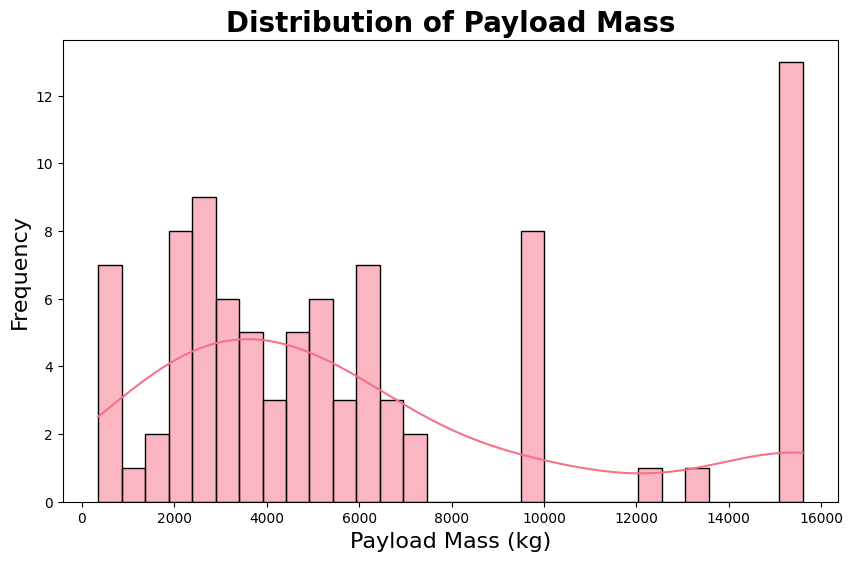

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_eda, x="PayloadMass", bins=30, kde=True)
plt.title("Distribution of Payload Mass", fontsize=20, fontweight='bold')
plt.xlabel("Payload Mass (kg)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

The histogram the distribution of payload mass in kilograms (kg) against frequency. Key observations that can be made from the graph include:

* Multimodal Distribution: The graph appears to have multiple peaks, suggesting the data may be divided into different clusters or categories of payload masses.

* Higher Frequencies for Lower Masses: Most payloads fall in the lower mass range (0-5000 kg), which can be seen from the concentration of bars in this range.

* Gaps in Data: There are some significant gaps, especially between 10,000 kg and 12,000 kg, indicating there are few payloads in that range.

* Skewness: The tail of the distribution extends towards the higher payload mass (right), meaning the data is slightly right-skewed, with some extremely heavy payloads (around 16,000 kg).

In summary, the distribution shows that most payloads are lighter, but there are a few very heavy ones, possibly indicating different types of payloads or missions.

# Plot Payload Mass vs. Flight Number

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


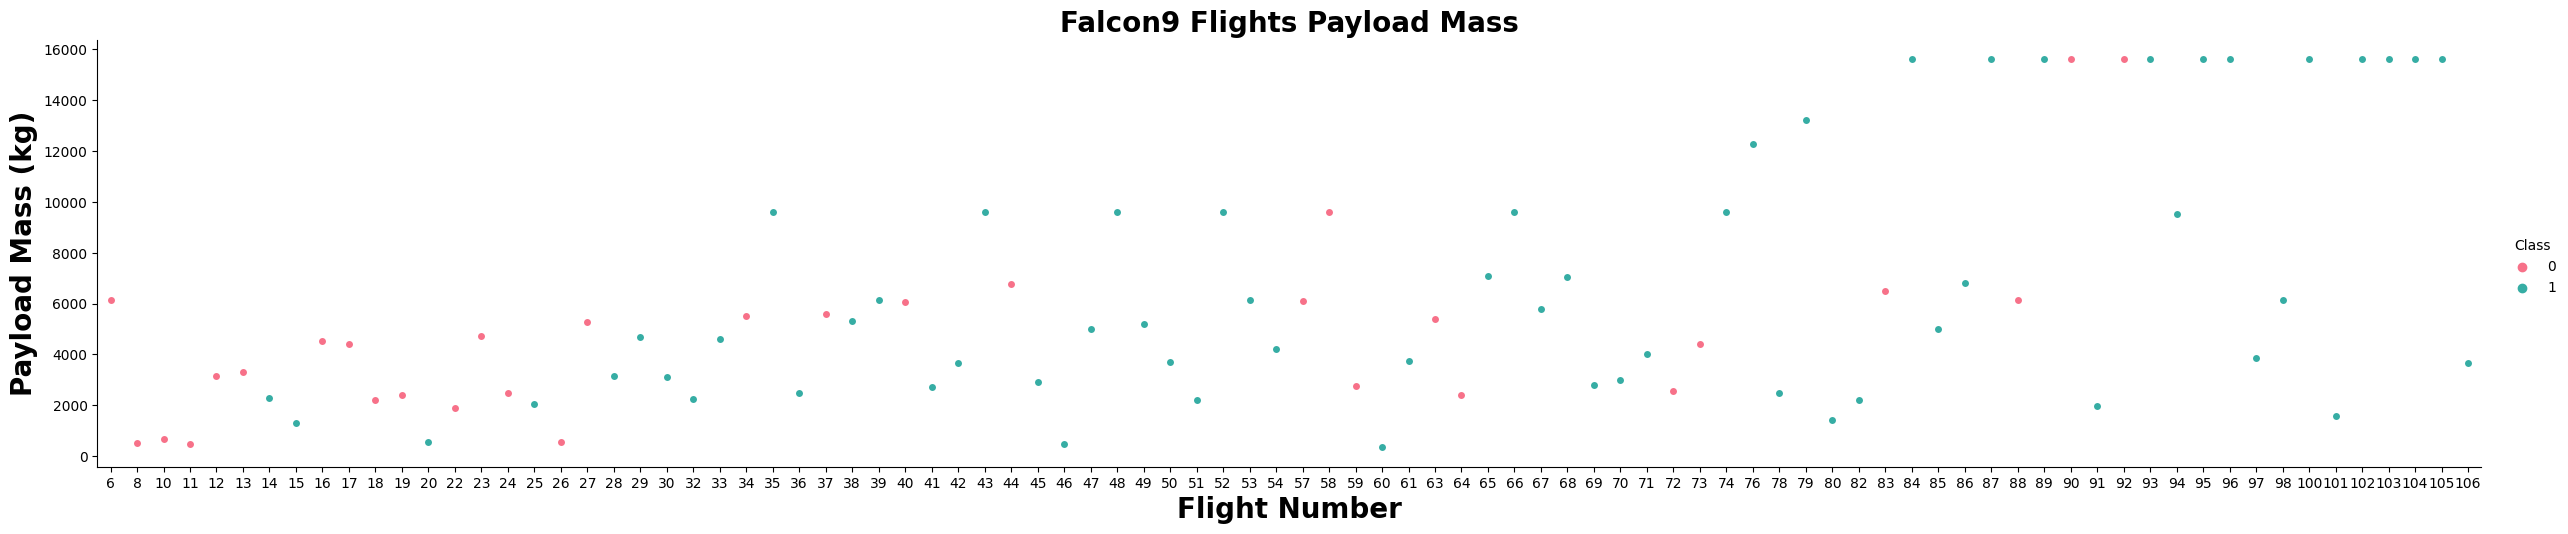

In [86]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df_eda, aspect=5)
plt.title("Falcon9 Flights Payload Mass", fontsize=20, fontweight='bold')
plt.xlabel("Flight Number", fontsize=20, fontweight='bold')
plt.ylabel("Payload Mass (kg)", fontsize=20, fontweight='bold')
plt.show()

The differences in payload mass across various flights likely reflect the wide variety of missions carried out by Falcon9 rockets. Some missions demand heavier equipment or larger cargo, resulting in higher payload weights, while others involve lighter payloads.
Regarding Falcon9's performance, the presence of both light and heavy payloads across different flight numbers suggests that the rocket has consistently maintained its ability to support a broad spectrum of payload weights over time.

# Plot Flight Number vs. Launch Site

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


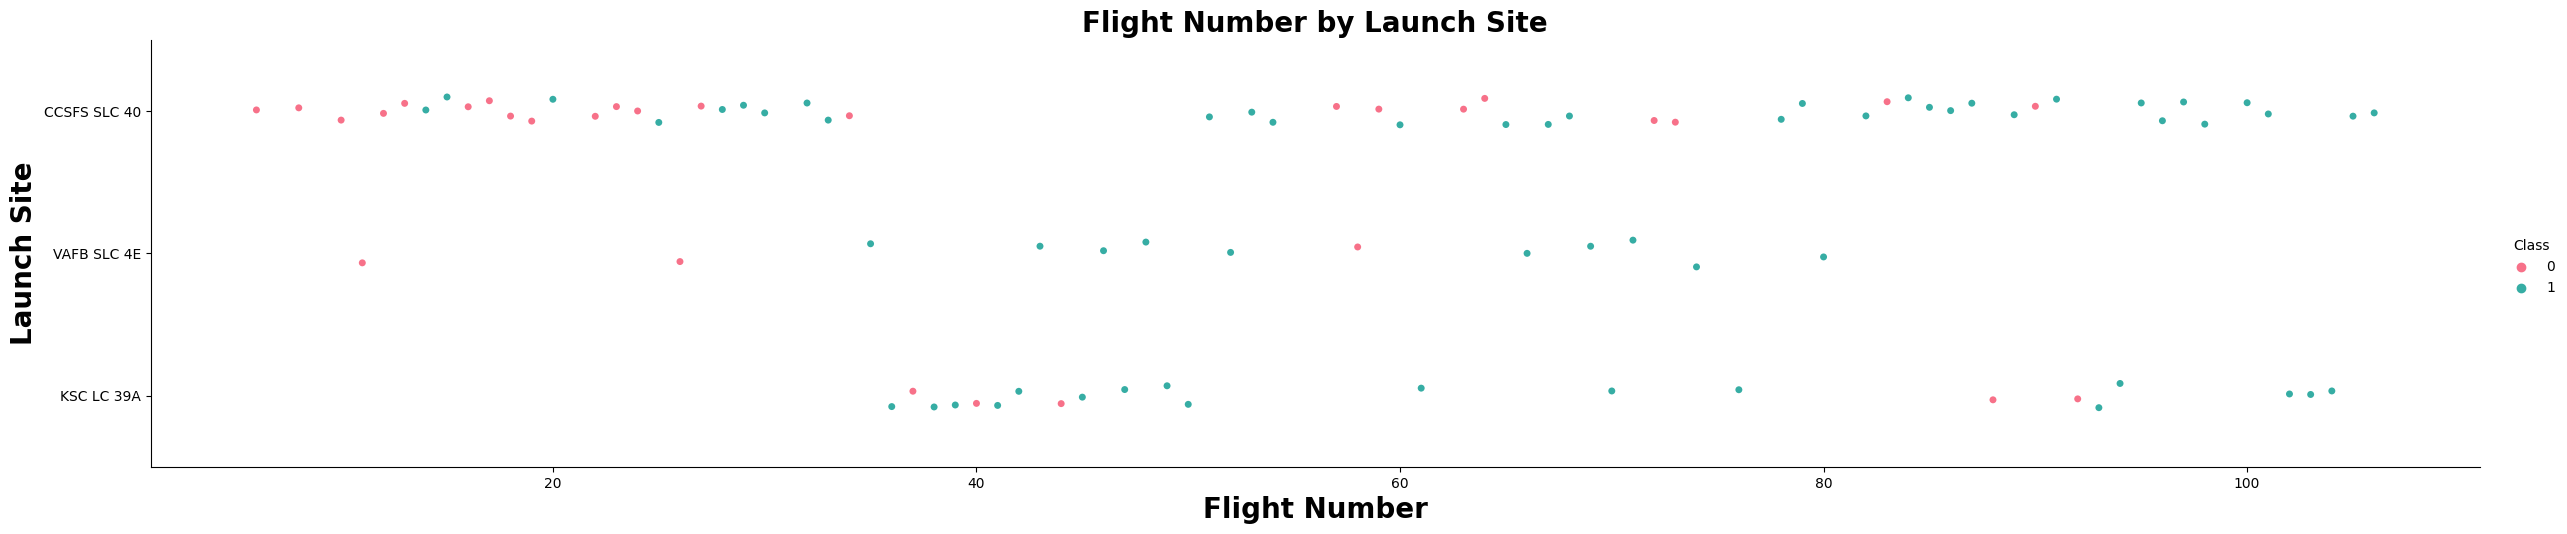

In [87]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df_eda, aspect=5)
plt.title("Flight Number by Launch Site", fontsize=20, fontweight='bold')
plt.xlabel("Flight Number", fontsize=20, fontweight='bold')
plt.ylabel("Launch Site", fontsize=20, fontweight='bold')
plt.show()

The majority of flights take off from CCSFS SLC 40, with KSC LC 39A being the next most common, followed by VAFB SLC 4E.
Flight numbers span from approximately 1 to over 80, reflecting the growth of Falcon9 missions over time.
There doesn't seem to be any clear trend indicating that success rates are higher or lower in later flights, as both successful and unsuccessful flights are spread throughout the flight numbers.

# Boxplot of Payload Mass by Orbit

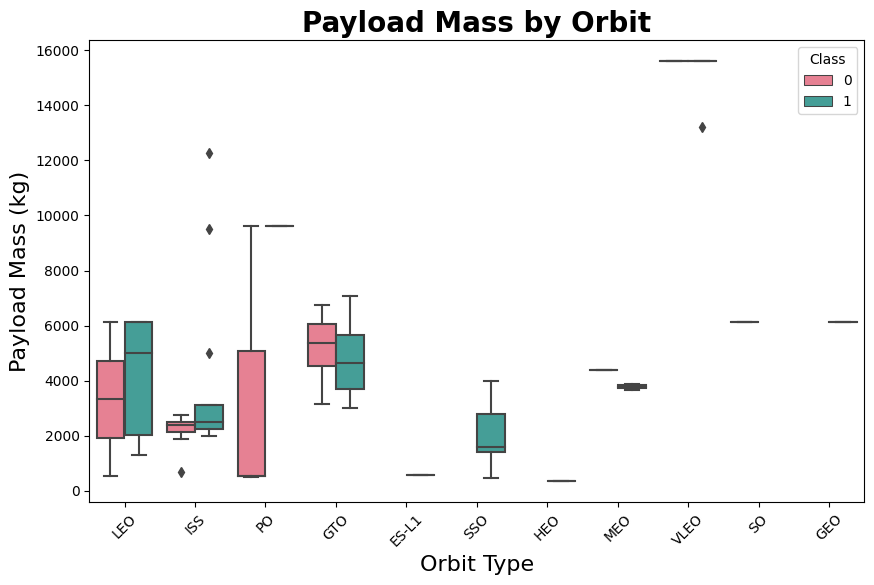

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Orbit", y="PayloadMass", hue="Class", data=df_eda)
plt.title("Payload Mass by Orbit", fontsize=20, fontweight='bold')
plt.xlabel("Orbit Type", fontsize=16)
plt.ylabel("Payload Mass (kg)", fontsize=16)
plt.xticks(rotation=45)
plt.show()

The boxplot compares payload mass across different orbit types (e.g., LEO, GTO, etc.), with data separated by class 0 and class 1.

Key takeaways:

* LEO (Low Earth Orbit) has the widest range of payload masses, with both successful (class and unsuccessful (class 0) flights showing significant variation.
* GTO (Geostationary Transfer Orbit) has relatively heavier payloads, but there’s less variation compared to LEO.
* Some orbit types (like ES-L1 and SO) show smaller or consistent payload masses.
* In most orbit types, class 0 (unsuccessful) and class 1 (successful) flights have overlapping payload ranges, meaning payload mass does not have a clear influence on flight success across these orbits.

Overall, the chart suggests that different orbit types have varying payload mass ranges, and there isn't a strong correlation between payload mass and the likelihood of flight success.

# Plot Payload Mass vs. Launch Site

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


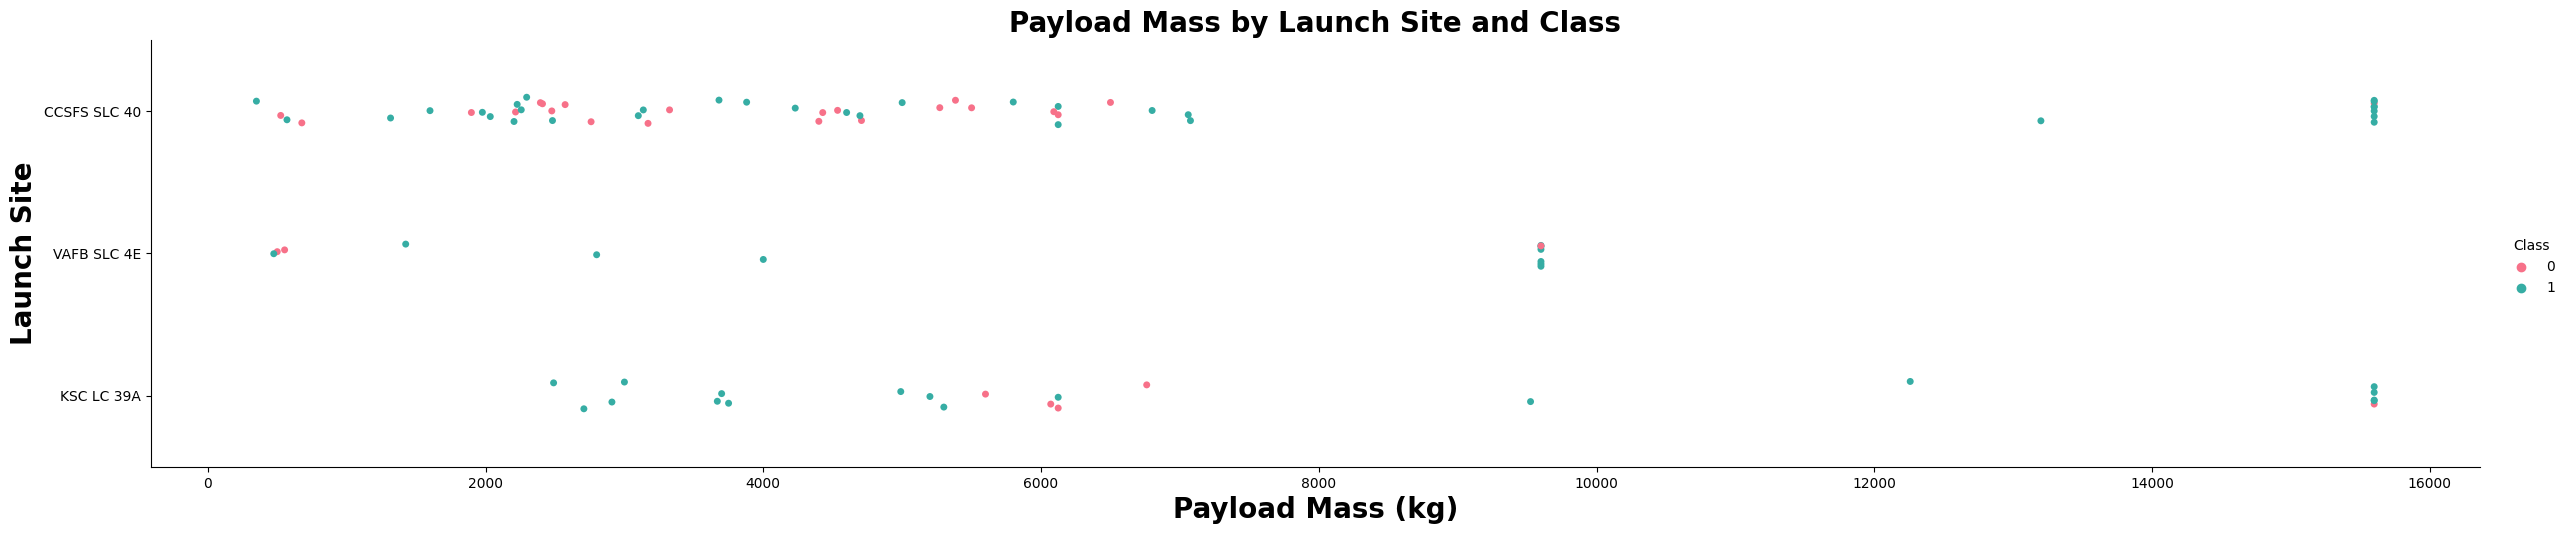

In [89]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df_eda, aspect=5)
plt.title("Payload Mass by Launch Site and Class", fontsize=20, fontweight='bold')
plt.xlabel("Payload Mass (kg)", fontsize=20, fontweight='bold')
plt.ylabel("Launch Site", fontsize=20, fontweight='bold')
plt.show()

* Light Payloads (under 5,000 kg): The majority of launches from all locations are successful (Class 1), with only a few failures (Class 0), particularly at the VAFB SLC 4E site.
* Intermediate Payloads (5,000 kg to 10,000 kg): There’s a more balanced distribution of successes and failures, especially at CCSFS SLC 40 and KSC LC 39A.
* Heavy Payloads (above 10,000 kg): Most of these missions are successful (Class 1), with the heaviest payloads, nearing or exceeding 15,000 kg, all being launched from CCSFS SLC 40 and achieving success.
CCSFS SLC 40 stands out for its adaptability, managing both light and heavy payloads with a high success rate.

# Success rate by Orbit Type

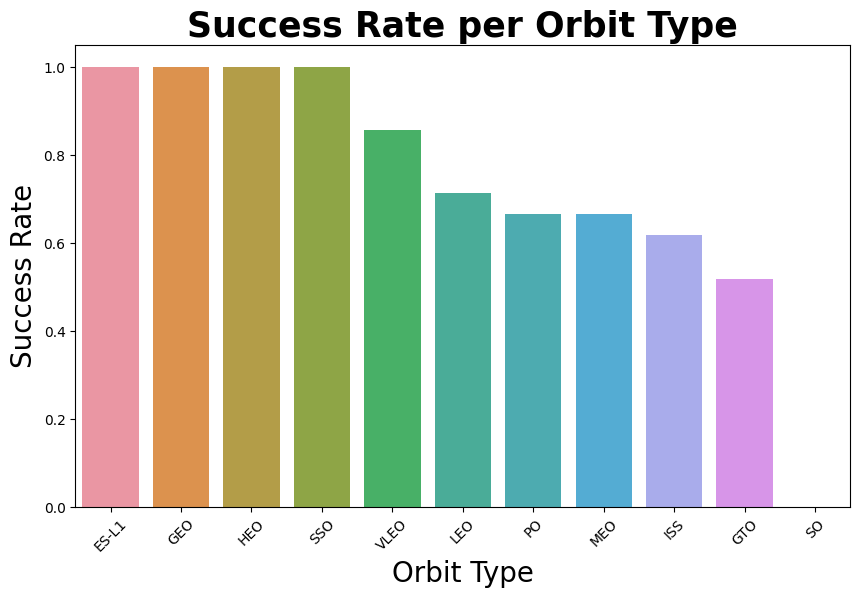

In [90]:
orbit_success_rate = df_eda.groupby(['Orbit'])['Class'].mean().reset_index().sort_values(by='Class', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Orbit", y="Class", data=orbit_success_rate)
plt.title("Success Rate per Orbit Type", fontsize=25, fontweight='bold')
plt.xlabel("Orbit Type", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.xticks(rotation=45)
plt.show()

The orbits 'ES-L1', 'GEO', and 'HEO' demonstrate very high success rates, approaching 100%. However, as we shift towards 'SO', the success rate declines, with 'SO' showing the lowest success rate among the orbits presented.

# Scatterplot of Flight Number vs. Orbit Type

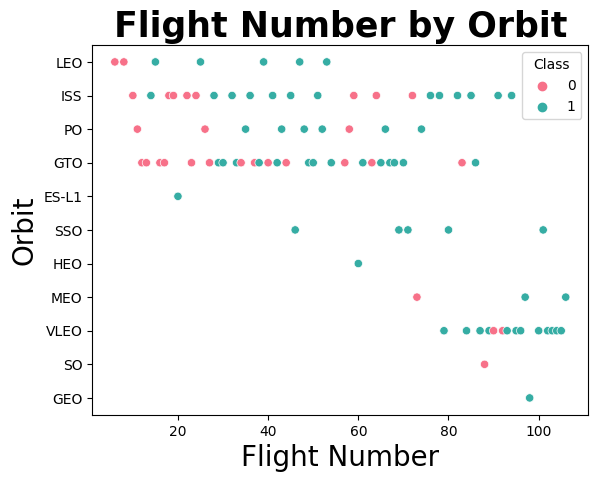

In [91]:
sns.set_palette("husl", 2)
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df_eda)
plt.title("Flight Number by Orbit", fontsize=25, fontweight='bold')
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

Early Mission Difficulties: A higher number of failures (represented by orange dots) can be observed in the lower flight numbers across several orbit types, indicating that early missions encountered difficulties. As flight numbers rise, there is a clear trend toward more successful missions.
In conclusion, the data suggests that despite early challenges (with more failures in the initial flights), most orbit types show improvement over time. Orbits such as 'GEO', 'SO', and 'ES-L1', though with fewer data points, exhibit a higher rate of failure, pointing to the unique difficulties associated with these missions.

# Scatterplot of Payload Mass vs. Orbit Type

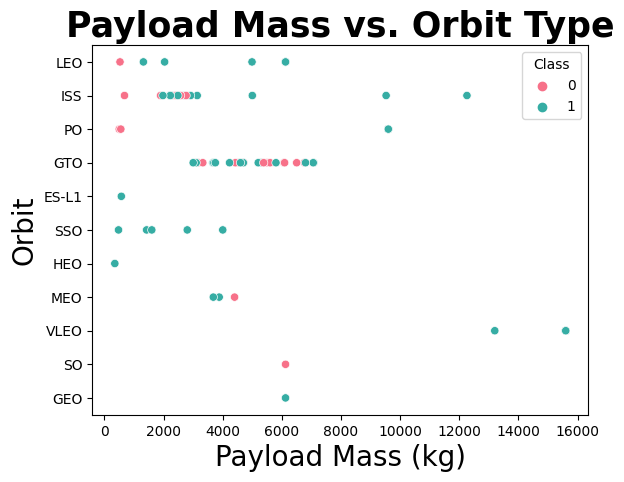

In [92]:
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df_eda)
plt.title("Payload Mass vs. Orbit Type", fontsize=25, fontweight='bold')
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

Early Mission Challenges: There is a noticeable concentration of failures (orange dots) in the lower flight numbers for several orbit types, indicating that the initial missions experienced difficulties. As flight numbers increase, there is a clear trend towards more successful missions.
Overall, the data suggests that, despite early setbacks (with more failures in the lower flight numbers), most orbit types have shown improvement over time. However, orbits like 'GEO', 'SO', and 'ES-L1', while less frequent, display higher failure rates, likely due to the greater complexities involved in these missions.

# Success rate per year

In [93]:
df_eda['Year'] = pd.to_datetime(df_eda['Date']).dt.year
annual_success_rate = df_eda.groupby('Year')['Class'].mean().reset_index()

# Line plot of success rate by year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


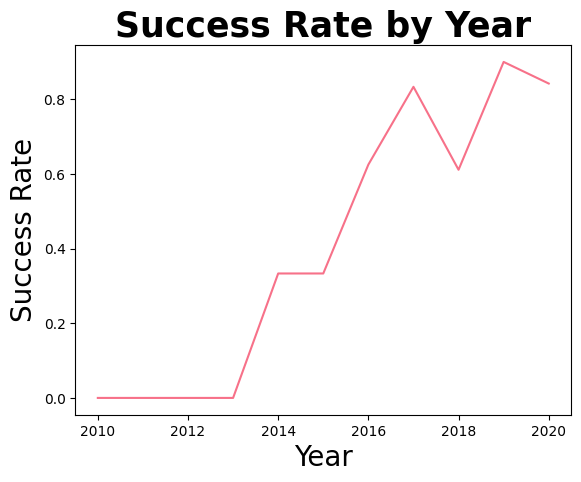

In [94]:
sns.lineplot(x='Year', y='Class', data=annual_success_rate)
plt.title("Success Rate by Year", fontsize=25, fontweight='bold')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.show()

There appears to be a positive trend in success rates as the years progress.